# import library

In [1]:
import numpy as np
from scipy.stats import norm
from sklearn import datasets
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
from sklearn import linear_model

# Import ''diabetes''

In [2]:
datasets.load_diabetes()

diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target

Each variable is centered and standardized:

In [3]:
print(diabetes_X.sum(axis = 0))
print(np.dot(np.transpose(diabetes_X),diabetes_X))

[-1.60635394e-13  5.78287418e-14 -3.55604435e-13  5.66491298e-14
 -3.90520949e-14  5.86544702e-14 -2.02199368e-13  1.66956726e-13
 -1.69323756e-13 -1.50849385e-13]
[[ 1.          0.1737371   0.18508467  0.33542671  0.26006082  0.21924314
  -0.07518097  0.2038409   0.27077678  0.30173101]
 [ 0.1737371   1.          0.0881614   0.24101317  0.03527682  0.14263726
  -0.37908963  0.33211509  0.14991756  0.20813322]
 [ 0.18508467  0.0881614   1.          0.39541532  0.24977742  0.26116991
  -0.36681098  0.4138066   0.44615865  0.38867999]
 [ 0.33542671  0.24101317  0.39541532  1.          0.24246971  0.18555783
  -0.17876121  0.25765337  0.39347814  0.39042938]
 [ 0.26006082  0.03527682  0.24977742  0.24246971  1.          0.89666296
   0.05151936  0.54220728  0.51550076  0.32571675]
 [ 0.21924314  0.14263726  0.26116991  0.18555783  0.89666296  1.
  -0.19645512  0.65981689  0.3183534   0.29060038]
 [-0.07518097 -0.37908963 -0.36681098 -0.17876121  0.05151936 -0.19645512
   1.         -0.738

# To increase the level of difficulty, we add some (insignificant) Gaussian variable to the database

In [4]:
n = diabetes_X.shape[0]

xadd = np.random.normal(0,1,[n,100])

diabetes_X  = np.column_stack((diabetes_X,xadd))
diabetes_X.shape

(442, 110)

# Now we split the sample in two parts: A training set and a test set 

In [5]:
diabetes_X_learn = diabetes_X[:300]
diabetes_y_learn = diabetes_y[:300]
diabetes_X_test = diabetes_X[301:]
diabetes_y_test = diabetes_y[301:]

diabetes_X_learn.shape ,diabetes_X_test.shape , diabetes_y_learn.shape , diabetes_y_test.shape

((300, 110), (141, 110), (300,), (141,))

OLS with sk learn (we keep in R1 the prediction error computed on the test set)

In [6]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_learn , diabetes_y_learn)

print(regr.coef_)
print(regr.intercept_)

R1 = regr.predict(diabetes_X_test) - diabetes_y_test

[ 7.43265374e+01 -2.40430226e+02  5.96699090e+02  2.58985837e+02
 -7.97327294e+02  2.89845166e+02  3.23982903e+02  3.08125698e+02
  8.55366904e+02  3.01925745e+01  7.71827445e+00  1.80374933e+00
 -1.35446859e+00 -5.14801595e+00 -1.21182147e+00 -1.10613624e+00
  3.92705836e+00  7.50488923e+00  6.60788015e+00 -4.02568349e+00
  3.44897876e+00 -4.31963426e+00  4.44860493e+00  3.26137738e+00
 -1.50685295e+00 -4.39530452e+00  2.06378330e+00 -6.59428367e-01
  8.07371077e+00 -1.21214771e-01  1.14324261e+00 -3.49509330e+00
  2.05522302e+00 -1.96206651e+00 -2.69110516e+00 -5.15600235e+00
  7.91700675e-01  1.23237384e+01 -4.95269401e+00  1.29916927e+00
  2.74094754e+00  5.08433934e+00 -2.44925985e-01 -5.29623556e+00
  9.70511262e-01 -4.09122889e+00  8.11506223e+00 -2.75533843e+00
 -2.10552557e+00 -2.17556787e+00 -1.03569233e+00  2.67904536e+00
  3.47873112e+00 -2.72410515e+00 -1.25564310e-01 -7.95573419e-01
 -2.56680800e+00  5.73869230e-01  3.03412234e+00  4.65840742e+00
 -4.44616424e+00  1.99098

# A first graph to visualize the residuals

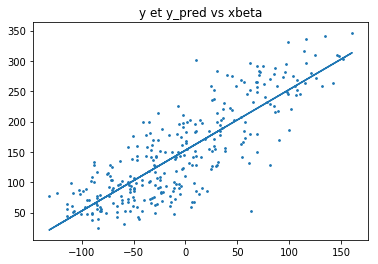

In [7]:
ypred_tmp = np.dot(diabetes_X_learn , regr.coef_ )
ypred = ypred_tmp +  regr.intercept_ 
#ypred = regr.predict(diabetes_X)


plt.figure() 
plt.plot(ypred_tmp , ypred)
plt.scatter(ypred_tmp , diabetes_y_learn , s =3 )
plt.title("y et y_pred vs xbeta")
plt.show()


# Forward variable selection

In [8]:
diabetes_X_aug = np.column_stack( (np.ones( (diabetes_X_learn.shape[0], 1 )), diabetes_X_learn )) 

p = diabetes_X_aug.shape[1]
n = diabetes_X_aug.shape[0]

test = np.zeros((p,p))
pval_mem = np.zeros(p)
pval = np.zeros((p,p))
resids = diabetes_y_learn

var_sel = []
var_remain = list(range(p))
in_test = []


regr = linear_model.LinearRegression(fit_intercept = False)


for k in range(p): 
    resids_mem = np.zeros((p,n))

    for i in var_remain:
        xtmp = diabetes_X_aug [:,[i]]
        regr.fit(xtmp , resids)
        
        #calcul de (x'x)
        xx = np.sum( diabetes_X_aug [:,[i]] ** 2 )    
        resids_mem [i,:] = regr.predict(xtmp) - resids
        sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / xx
        test[k,i] = np.sqrt(n) * np.abs(regr.coef_) / (np.sqrt( sigma2_tmp )) 
        pval[k,i] =   2 * (1 - norm.cdf(test[k,i]))

    ####separe en deux vecteurs la listes des variables séléctionnées et les autres
    best_var = np.argmax(test[k,:])
    var_sel.append(best_var)
    resids = resids_mem[best_var,:]
    pval_mem [k] = pval[k,best_var]
    var_remain = np.setdiff1d(var_remain,var_sel)



Let us plot the value of the test statistic for the 3 first steps

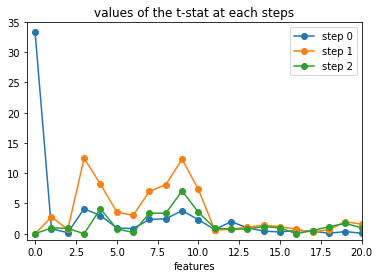

In [9]:
def foo(s1):
    return "step %s" % s1

fig = plt.figure()
for k in range(3): 
    lab_tmp = foo(k)
    plt.plot(np.arange(p),test[k,:], '-o',label = lab_tmp)
    plt.axis(xmin = -.5,xmax = 20,ymin = -1)
plt.legend(loc=1)
plt.title("values of the t-stat at each steps")
plt.xlabel("features")
plt.show()

At each step one may look at the pvalue associated to the selected variable 

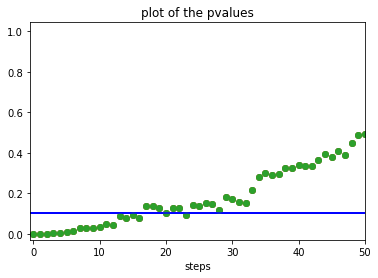

In [10]:
fig2 = plt.figure() 
for k in range(3): 
    plt.plot(np.arange(p),pval_mem, 'o')
    plt.plot([-0.5,50],[.1,.1],color = "blue" )
    plt.axis(xmin = -.5,xmax = 50,ymin = -.03)
plt.title("plot of the pvalues")
plt.xlabel("steps")
plt.show()

# We obtained the following selected variables

In [11]:
print("variables sélectionnées (dans l'ordre): " , 
      np.array(var_sel)[pval_mem<.1])

variables sélectionnées (dans l'ordre):  [ 0  3  9 42 47 44  2  5 69 98 85 90 96  4 38 33 68 53]


# Now we can run OLS with the selected variables

In [12]:
sel = np.array(var_sel)[pval_mem<.1]
k = np.count_nonzero(sel)
sel = sel[1:]
X_learn_forward = diabetes_X_learn[:,sel]

regr = linear_model.LinearRegression()
regr.fit(X_learn_forward , diabetes_y_learn)

print(regr.coef_)
print(regr.intercept_)

R2 = regr.predict(  diabetes_X_test[:,sel] )  - diabetes_y_test

[ 2.95677608e+02  2.47103284e+02  2.64515344e+00  3.82682733e-01
 -7.64406342e-01  7.88823100e+02 -2.74176455e+02  3.45401312e+00
 -1.20544821e+00  1.12556249e+00 -2.54127802e+00  1.81660988e+00
  1.67032091e+02  4.31109343e-01 -2.79828516e+00  7.52024306e+00
 -3.30647556e+00]
151.39211302226727


In [17]:
var_sel

[0,
 3,
 9,
 42,
 47,
 44,
 2,
 5,
 69,
 98,
 85,
 90,
 96,
 4,
 38,
 33,
 68,
 54,
 29,
 39,
 100,
 88,
 11,
 53,
 61,
 6,
 14,
 87,
 17,
 18,
 7,
 36,
 26,
 101,
 21,
 34,
 49,
 66,
 91,
 22,
 48,
 92,
 110,
 73,
 23,
 52,
 57,
 75,
 1,
 71,
 59,
 105,
 60,
 19,
 50,
 41,
 81,
 46,
 89,
 32,
 45,
 67,
 24,
 16,
 65,
 43,
 27,
 97,
 63,
 35,
 20,
 56,
 25,
 106,
 12,
 84,
 86,
 8,
 102,
 95,
 78,
 58,
 79,
 51,
 70,
 103,
 107,
 108,
 13,
 28,
 10,
 109,
 80,
 104,
 83,
 62,
 31,
 74,
 72,
 77,
 76,
 40,
 82,
 99,
 64,
 94,
 37,
 30,
 93,
 15,
 55]

# Finally, we compare OLS and OLS with forward variable selection according the prediction risk computed on the test set

In [13]:
sum(R1 ** 2 )  , sum ( R2** 2 )

(647879.4085970597, 509208.5223438035)